In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data=pd.read_csv('data.csv')
Data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
print(Data.isna().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [4]:
Data1=Data.drop(columns=['country'])
print(Data1)

     child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89 

In [5]:
Data1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
Data1_Normalized=((Data1-Data1.mean())/Data1.std())
Data1_Normalized.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [7]:
# K-means clustering
def k_means(data, k, max_iters=10000):

    np.random.seed(42)  # For reproducibility
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        
        distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in centroids])
        labels = np.argmin(distances, axis=0)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels


In [8]:
Data1_Normalizeds=Data1_Normalized.values
centroids,labels=k_means(Data1_Normalizeds,3)
print(labels)

[0 1 1 0 1 1 1 2 2 1 1 2 1 1 1 2 1 0 1 1 1 1 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 1 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 1 0 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


/var/folders/g7/933wbfq10918p5c7091lqpxm0000gn/T/ipykernel_28181/1260566177.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


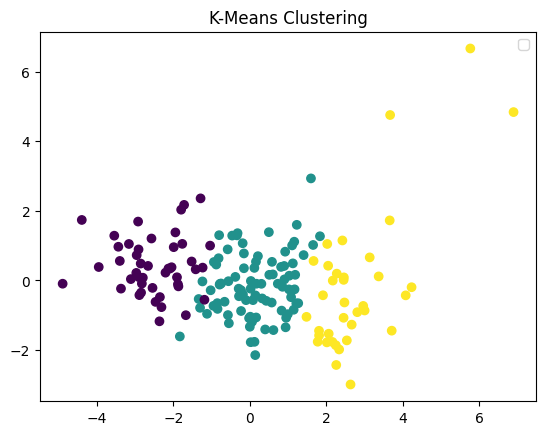

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(Data1_Normalized)
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', marker='o')

# Plot centroids
#plt.scatter(data_2d[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroids')

plt.title("K-Means Clustering")
plt.legend()
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

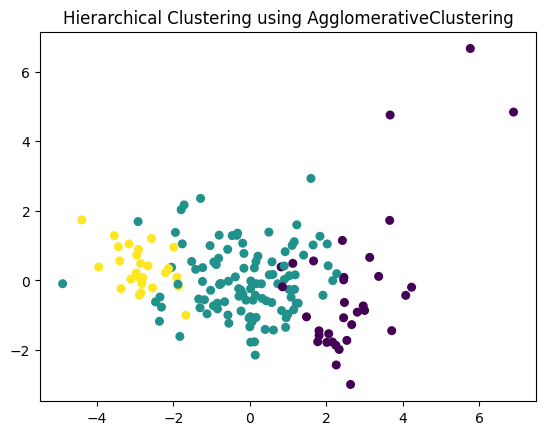

Cluster labels: [2 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 2 1 1 1 1 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 2 1 0 1 0 1 1 2 2 1 2 1 0 1 1 1 1 0
 0 0 1 0 1 1 2 1 0 1 1 1 1 1 1 0 1 0 1 2 2 1 1 2 0 1 1 1 1 1 1 1 2 1 1 1 0
 0 2 1 0 0 1 1 1 1 1 1 0 0 1 1 2 1 0 2 1 1 2 0 1 1 1 1 1 0 1 1 1 1 0 0 1 2
 1 1 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 1 2]


In [11]:
# Initialize the model with the number of clusters you want
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the model to the data
y_pred = model.fit_predict(Data1_Normalizeds)

# Visualize the resulting clusters
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=y_pred, cmap='viridis', s=30)
plt.title('Hierarchical Clustering using AgglomerativeClustering')
plt.show()

# Print the cluster labels assigned to each data point
print("Cluster labels:", y_pred)


In [12]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Compute the distance between two clusters using Ward's linkage
def ward_distance(cluster_a, cluster_b, X):
    # Compute the centroids (mean of the points) of both clusters
    centroid_a = np.mean(X[cluster_a], axis=0)
    centroid_b = np.mean(X[cluster_b], axis=0)
    
    # Compute the size of both clusters
    n_a = len(cluster_a)
    n_b = len(cluster_b)
    
    # Compute the squared Euclidean distance between the centroids
    distance = np.sum((centroid_a - centroid_b) ** 2)
    
    # Calculate the Ward’s linkage distance
    return (n_a * n_b) / (n_a + n_b) * distance

# Agglomerative Hierarchical Clustering with Ward’s Linkage
def ward_clustering(X, k):
    # Initialize each point as its own cluster
    clusters = [[i] for i in range(len(X))]
    
    # Compute initial pairwise distances
    dist_matrix = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i + 1, len(X)):
            dist_matrix[i][j] = euclidean_distance(X[i], X[j])
            dist_matrix[j][i] = dist_matrix[i][j]
    
    # While more than k clusters, merge the closest clusters
    while len(clusters) > k:
        min_dist = np.inf
        merge_i, merge_j = -1, -1
        
        # Find the two clusters with the minimum Ward's distance
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = ward_distance(clusters[i], clusters[j], X)
                if dist < min_dist:
                    min_dist = dist
                    merge_i, merge_j = i, j
        
        # Merge the two closest clusters
        clusters[merge_i].extend(clusters[merge_j])
        clusters.pop(merge_j)
    
    return clusters
k = 3
clusters = ward_clustering(Data1_Normalizeds, k)
print("Clusters formed:", clusters)

Clusters formed: [[0, 155, 25, 64, 26, 126, 132, 17, 28, 150, 36, 56, 129, 80, 93, 31, 32, 97, 112, 37, 40, 106, 63, 94, 166, 147, 66], [1, 48, 61, 124, 6, 76, 30, 141, 105, 127, 151, 4, 86, 24, 85, 100, 92, 16, 118, 152, 78, 9, 143, 14, 156, 10, 13, 41, 121, 42, 138, 20, 130, 57, 104, 39, 102, 43, 135, 51, 90, 67, 134, 95, 148, 96, 117, 164, 131, 18, 65, 83, 27, 52, 162, 136, 21, 108, 137, 81, 88, 101, 87, 2, 79, 70, 140, 5, 71, 125, 22, 33, 35, 153, 160, 34, 119, 45, 62, 46, 12, 69, 19, 120, 47, 109, 161, 59, 84, 146, 55, 154, 50, 116, 107, 3, 99, 38, 49, 72, 142, 165, 149, 103, 163, 113], [7, 77, 29, 54, 60, 122, 75, 139, 111, 158, 74, 8, 58, 44, 53, 144, 68, 159, 15, 110, 73, 114, 145, 11, 89, 115, 128, 23, 82, 157, 123, 91, 98, 133]]


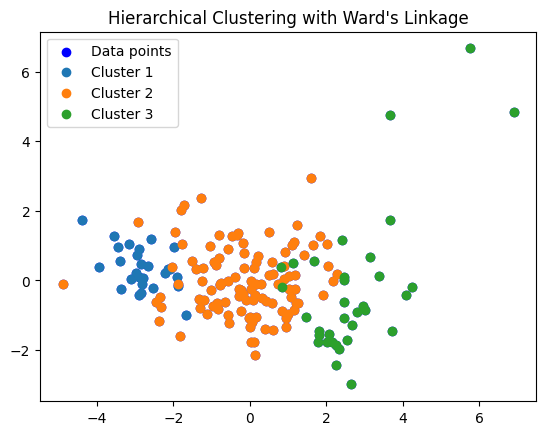

In [13]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', label='Data points')
for cluster in clusters:
    cluster_points = data_2d[cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {clusters.index(cluster)+1}')
plt.title("Hierarchical Clustering with Ward's Linkage")
plt.legend()
plt.show()

In [14]:
y=pd.DataFrame(labels)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data1_Normalized, y, test_size=0.2, random_state=42)

In [15]:
y_predicted=[]
from collections import Counter
def knn(X_train,X_test,y_train):
    for x_t in X_test:
        i=0
        arr=[0,0,0]
        loc=[]
        for x,y in zip(X_train,y_train):
            dist=np.sqrt(np.sum((x - x_t) ** 2))
            if(i<3):
                arr[i]=dist
                loc.append(y)
                i+=1
            else:
                for j in range(3):
                    if(arr[j]>dist):
                        arr[j]=dist
                        loc.pop(j)
                        loc.insert(j,y)
        print(loc)
        '''def find_highest_occurrence(lst):
            count = Counter(lst)
            most_common = count.most_common(1)[0]
            return most_common
        number, occurrences = find_highest_occurrence(loc)'''
        y_predicted.append(loc[0])
    

In [16]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
knn(X_train,X_test,y_train)

[array([0]), array([0]), array([0])]
[array([1]), array([1]), array([1])]
[array([1]), array([1]), array([1])]
[array([0]), array([0]), array([0])]
[array([1]), array([1]), array([1])]
[array([2]), array([2]), array([2])]
[array([1]), array([1]), array([1])]
[array([2]), array([2]), array([2])]
[array([1]), array([1]), array([1])]
[array([1]), array([1]), array([1])]
[array([1]), array([1]), array([1])]
[array([2]), array([2]), array([2])]
[array([2]), array([2]), array([2])]
[array([2]), array([2]), array([2])]
[array([1]), array([1]), array([1])]
[array([0]), array([0]), array([0])]
[array([0]), array([0]), array([0])]
[array([1]), array([1]), array([1])]
[array([1]), array([1]), array([1])]
[array([1]), array([1]), array([1])]
[array([1]), array([1]), array([1])]
[array([1]), array([1]), array([1])]
[array([1]), array([1]), array([1])]
[array([1]), array([1]), array([1])]
[array([2]), array([2]), array([2])]
[array([2]), array([2]), array([2])]
[array([1]), array([1]), array([1])]
[

In [17]:
y_prec=[]
for i in range(34):
    y_prec.append(y_predicted[i][0])
   

In [18]:
y_prec # Accuracy 89%

[0,
 1,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1]

In [19]:
X_trains, X_tests, y_trains, y_tests = train_test_split(Data1_Normalized, y_pred, test_size=0.2, random_state=42)

In [22]:
#X_trains=X_trains.values
#X_tests=X_tests.values
#y_trains=y_trains.values
knn(X_trains,X_tests,y_trains)

[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[2, 2, 2]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[1, 1, 1]
[2, 2, 2]
[2, 2, 2]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[0, 0, 0]
[0, 0, 0]
[1, 1, 1]
[0, 0, 0]
[1, 1, 1]
[2, 2, 2]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]
[1, 1, 1]


In [23]:
y_prec1=[]
for i in range(34):
    y_prec1.append(y_predicted[i][0])
